# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# create query url
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# initialize lists to save the data into
cities_list = []
latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# setting the city and set numbers
city_number = 1
set_number = 1

# retrieve the data for each city
print('Beginning Data Retrieval')
print('-----------------------------')

for city in cities:
    
    # use try and except to catch any instances where the API does not recognize the city
    try:
        response = requests.get(query_url + city).json()
    
        # save data
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        cities_list.append(city)
        
        print(f'Processing Record {city_number} number of Set {set_number} | {city}')
        
        # changing the city number and set number
        if city_number == 50:
            city_number = 1
            set_number += 1
        else:
            city_number += 1

    except:
        print("City not found. Skipping...")

print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 number of Set 1 | lensk
Processing Record 2 number of Set 1 | new norfolk
Processing Record 3 number of Set 1 | lebu
Processing Record 4 number of Set 1 | juba
Processing Record 5 number of Set 1 | kapaa
Processing Record 6 number of Set 1 | barrow
Processing Record 7 number of Set 1 | yellowknife
Processing Record 8 number of Set 1 | atuona
Processing Record 9 number of Set 1 | marsabit
Processing Record 10 number of Set 1 | dikson
Processing Record 11 number of Set 1 | ushuaia
Processing Record 12 number of Set 1 | punta arenas
Processing Record 13 number of Set 1 | ancud
Processing Record 14 number of Set 1 | uyuni
Processing Record 15 number of Set 1 | ribeira grande
Processing Record 16 number of Set 1 | bredasdorp
Processing Record 17 number of Set 1 | kabardinka
Processing Record 18 number of Set 1 | busselton
Processing Record 19 number of Set 1 | inuvik
Processing Record 20 number of Set 1 | aklavik
Pro

Processing Record 11 number of Set 4 | suhbaatar
Processing Record 12 number of Set 4 | grand gaube
Processing Record 13 number of Set 4 | provideniya
Processing Record 14 number of Set 4 | atikokan
City not found. Skipping...
Processing Record 15 number of Set 4 | tasiilaq
Processing Record 16 number of Set 4 | alice town
Processing Record 17 number of Set 4 | naze
Processing Record 18 number of Set 4 | sena madureira
Processing Record 19 number of Set 4 | leningradskiy
Processing Record 20 number of Set 4 | saldanha
Processing Record 21 number of Set 4 | dingle
Processing Record 22 number of Set 4 | clyde river
Processing Record 23 number of Set 4 | butaritari
Processing Record 24 number of Set 4 | maiduguri
Processing Record 25 number of Set 4 | muzhi
Processing Record 26 number of Set 4 | bethel
Processing Record 27 number of Set 4 | kruisfontein
Processing Record 28 number of Set 4 | cabedelo
City not found. Skipping...
Processing Record 29 number of Set 4 | constitucion
Processin

Processing Record 27 number of Set 7 | zarubino
Processing Record 28 number of Set 7 | anadyr
Processing Record 29 number of Set 7 | shar
Processing Record 30 number of Set 7 | haines junction
Processing Record 31 number of Set 7 | kailua
Processing Record 32 number of Set 7 | kununurra
Processing Record 33 number of Set 7 | zhuanghe
Processing Record 34 number of Set 7 | tuktoyaktuk
Processing Record 35 number of Set 7 | narsaq
Processing Record 36 number of Set 7 | crawfordsville
Processing Record 37 number of Set 7 | minden
Processing Record 38 number of Set 7 | szczecinek
Processing Record 39 number of Set 7 | daru
Processing Record 40 number of Set 7 | suzun
Processing Record 41 number of Set 7 | chulym
Processing Record 42 number of Set 7 | beringovskiy
Processing Record 43 number of Set 7 | mana
City not found. Skipping...
Processing Record 44 number of Set 7 | kijang
Processing Record 45 number of Set 7 | rudnichnyy
Processing Record 46 number of Set 7 | yantzaza
Processing Rec

Processing Record 41 number of Set 10 | raudeberg
Processing Record 42 number of Set 10 | tazovskiy
Processing Record 43 number of Set 10 | lyngseidet
Processing Record 44 number of Set 10 | sergeyevka
Processing Record 45 number of Set 10 | loa janan
Processing Record 46 number of Set 10 | yerbogachen
Processing Record 47 number of Set 10 | tual
Processing Record 48 number of Set 10 | kedrovyy
Processing Record 49 number of Set 10 | jacareacanga
Processing Record 50 number of Set 10 | sechura
Processing Record 1 number of Set 11 | koungou
Processing Record 2 number of Set 11 | calafell
Processing Record 3 number of Set 11 | belaya gora
Processing Record 4 number of Set 11 | bilgram
Processing Record 5 number of Set 11 | kudahuvadhoo
Processing Record 6 number of Set 11 | filingue
Processing Record 7 number of Set 11 | fort frances
Processing Record 8 number of Set 11 | najran
Processing Record 9 number of Set 11 | burns lake
Processing Record 10 number of Set 11 | saint-augustin
City 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
# create the dataframe
weather_df = pd.DataFrame({'city': cities_list,
                           'lat': latitude,
                           'lng': longitude,
                           'Max Temp': max_temp,
                           'Humidity': humidity,
                           'Cloudiness': cloudiness,
                           'Wind Speed': wind_speed,
                           'Country': country,
                           'Date': date})

# export the dataframe to a csv file
weather_df.to_csv(output_data_file)

weather_df.head()

,city,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lensk,60.7253,114.9278,66.36,89,90,1.81,RU,1659032892
1,new norfolk,-42.7826,147.0587,42.30,84,33,1.99,AU,1659032892
2,lebu,-37.6167,-73.6500,53.71,72,0,12.44,CL,1659032892
3,juba,4.8517,31.5825,71.82,84,62,2.64,SS,1659032893
4,kapaa,22.0752,-159.3190,79.48,80,75,10.36,US,1659032893


In [34]:
# if you want to get the data from the saved csv
# weather_df = pd.read_csv(output_data_file)

# weather_df.head()

In [5]:
# look at the basic statistics for the data
weather_df.describe()

# note: we can see that humidity does not exceed 100%

,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,21.198323,15.610312,71.330302,69.663701,55.912811,8.311726,1.659033e+09
std,32.341422,88.970610,14.364317,20.785272,37.762149,5.420392,8.252874e+01
min,-54.800000,-175.200000,33.240000,2.000000,0.000000,0.000000,1.659032e+09
25%,-5.349725,-66.546875,60.607500,60.000000,20.000000,4.270000,1.659033e+09
50%,23.534600,24.389650,73.625000,75.000000,64.500000,6.910000,1.659033e+09
75%,49.030450,89.764375,81.295000,85.000000,97.000000,11.500000,1.659033e+09
max,78.218600,179.316700,112.770000,100.000000,100.000000,28.770000,1.659033e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [41]:
#  Get the indices of cities that have humidity over 100%.

if weather_df['Humidity'].max() > 100:
    
    humid_indices = weather_df.loc[weather_df['Humidity'] >= 100].index.to_list()

In [42]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

if weather_df['Humidity'].max() > 100:
    # drop rows with humidity greater than 100
    clean_city_data = weather_df.drop(humid_indices, inplace=False)
    
else:
    # else create a copy of the dataframe
    clean_city_data = weather_df.copy(deep=True)

clean_city_data.head()

,city,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lensk,60.7253,114.9278,66.36,89,90,1.81,RU,1659032892
1,new norfolk,-42.7826,147.0587,42.30,84,33,1.99,AU,1659032892
2,lebu,-37.6167,-73.6500,53.71,72,0,12.44,CL,1659032892
3,juba,4.8517,31.5825,71.82,84,62,2.64,SS,1659032893
4,kapaa,22.0752,-159.3190,79.48,80,75,10.36,US,1659032893


In [43]:
# check to make sure that humidity max is less than or equal to 100
clean_city_data.describe()

,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,21.198323,15.610312,71.330302,69.663701,55.912811,8.311726,1.659033e+09
std,32.341422,88.970610,14.364317,20.785272,37.762149,5.420392,8.252874e+01
min,-54.800000,-175.200000,33.240000,2.000000,0.000000,0.000000,1.659032e+09
25%,-5.349725,-66.546875,60.607500,60.000000,20.000000,4.270000,1.659033e+09
50%,23.534600,24.389650,73.625000,75.000000,64.500000,6.910000,1.659033e+09
75%,49.030450,89.764375,81.295000,85.000000,97.000000,11.500000,1.659033e+09
max,78.218600,179.316700,112.770000,100.000000,100.000000,28.770000,1.659033e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

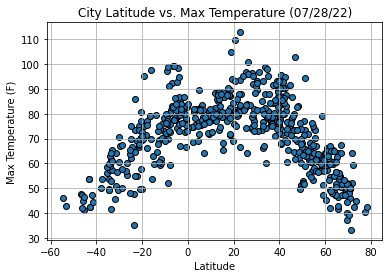

In [44]:
# create scatter plot for latitude vs temperature

# get values for the scatter plot
lat_values = clean_city_data['lat']
temp_values = clean_city_data['Max Temp']

# create the scatter plot
plt.scatter(lat_values, temp_values, edgecolors='black')

# formatting
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (07/28/22)')
plt.grid()

# save the plot as an image
plt.savefig('Images/TempVLat.png')

plt.show()

In this scatter plot, the code is analyzing the relationship between latitude and the maximum temperature for July 28, 2022. We can see a parabolic trend in the data, which confirms our general knowledge about temperatures on Earth. The closer to the North or South Pole a city is, the colder the maximum temperature for the day should be. Cities closer to the equator, on the other hand, should have a higher maximum temperature. We can also see that it is currently summer for the northern hemisphere, since the areas close to the equator in the northern hemisphere seem to have more cities with very hot maximum temperatures compared to the southern hemisphere.

## Latitude vs. Humidity Plot

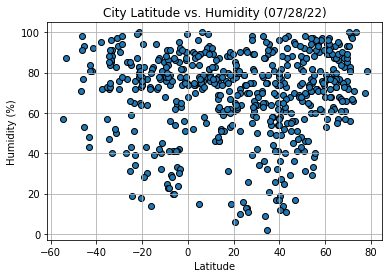

In [45]:
# create scatter plot for latitude vs humidity

# get the humidity values for the plot
humidity_values = clean_city_data['Humidity']

# create the scatter plot
plt.scatter(lat_values, humidity_values, edgecolors='black')

# formatting
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (07/28/22)')
plt.grid()

# save the plot as an image
plt.savefig('Images/HumidVLat.png')

plt.show()

In this scatter plot, we are analyzing the relationship between latitude and the humidity level. There does not seem to be any relationship between the two values according to the scatter plot. This could mean that humidity is, perhaps, not determined by latitude, but instead by some other factor.

## Latitude vs. Cloudiness Plot

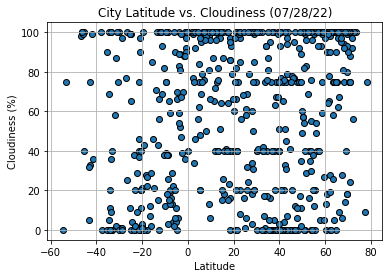

In [46]:
# create scatter plot for latitude vs cloudiness

# get the cloudiness values for the plot
cloudy_values = clean_city_data['Cloudiness']

# create the scatter plot
plt.scatter(lat_values, cloudy_values, edgecolors='black')

# formatting
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (07/28/22)')
plt.grid()

# save the plot as an image
plt.savefig('Images/CloudVLat.png')

plt.show()

In this plot, we are analyzing the relationship between latitude and cloudiness. Just like the previous chart, there does not seem to be any relationship between the two variables. One thing that we can see is that certain cloudiness levels seem to be more popular than others. For example, 100% cloudiness seems to have the most data points out of all of the different levels.

## Latitude vs. Wind Speed Plot

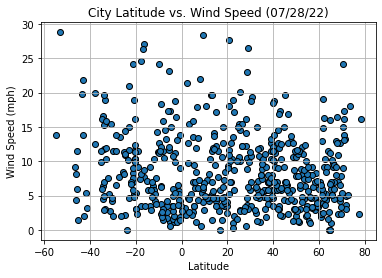

In [47]:
# create scatter plot for latitude vs temperature

# get the wind speed values for the scatter plot
wind_values = clean_city_data['Wind Speed']

# create the scatter plot
plt.scatter(lat_values, wind_values, edgecolors='black')

# formatting
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (07/28/22)')
plt.grid()

# save the plot as an image
plt.savefig('Images/WindVLat.png')

plt.show()

In this scatter plot, we are analyzing the relationship between latitude and wind speed. There again does not seem to be any relationship between the two variables. We can determine, however, that wind speeds of less than 15 miles per hour are the most common.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4868656591980875


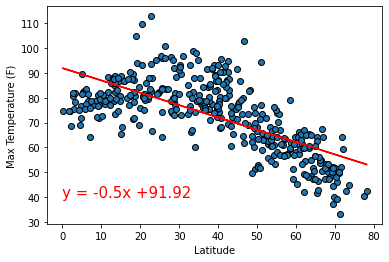

In [48]:
# get only northern hemisphere values
north_lat_values = clean_city_data.loc[clean_city_data['lat'] >= 0]['lat']
north_temp_values = clean_city_data.loc[clean_city_data['lat'] >= 0]['Max Temp']

# perform linear regression
# create string of line equation
# create the scatter plot
# formatting
# print the r-squared value
# save the plot as an image
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat_values, north_temp_values)
regress_values = north_lat_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(north_lat_values, north_temp_values, edgecolors='black')
plt.plot(north_lat_values, regress_values, "r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(line_eq,(0,40),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.savefig('Images/NorthTempVLat.png')

plt.show()

This linear regression model is looking at the relationship between latitude in the northern hemisphere and the maximum temperature for July 28, 2022. There is an overall downward trend in the data, although it only has a slight correlation as determined by the r-squared value. This might be because the data forms more of a parabola than a straight line. This is probably due to the fact that it is summer, and the tilt of the earth's axis means that the sun is more intense slightly above the equator. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5910893953387024


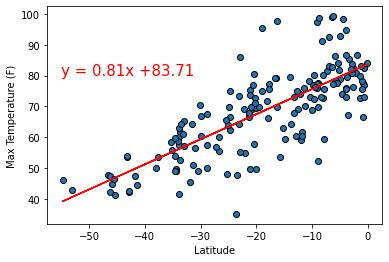

In [49]:
# get only southern hemisphere
south_lat_values = clean_city_data.loc[clean_city_data['lat'] < 0]['lat']
south_temp_values = clean_city_data.loc[clean_city_data['lat'] < 0]['Max Temp']
# perform linear regression
# create string of line equation
# create the scatter plot
# formatting
# print the r-squared value
# save the plot as an image
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat_values, south_temp_values)
regress_values = south_lat_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(south_lat_values, south_temp_values, edgecolors='black')
plt.plot(south_lat_values, regress_values, "r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(line_eq,(-55,80),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.savefig('Images/SouthTempVLat.png')

plt.show()

This linear regression model is looking at the relationship between latitude in the southern hemisphere and the maximum temperature for July 28, 2022. Overall, the data is trending upwards with a higher correlation than for the northern hemisphere. This can again be explained by the tilt in the earth's axis and the fact that it is winter in the southern hemisphere.

We can also see that there seems to be less data points for the southern hemisphere than for the northern hemisphere. This is because there is more land in the northern hemisphere than the southern. Thus, when looking for nearby cities, it is more likely that coordinates in the southern hemisphere were in an ocean (not near a city) than coordinates in the northern hemisphere. This fact also explains why the southern hemisphere has a smaller range of latitudes than the northern hemisphere. Most of the land in the southern hemisphere is closer to the equator than the land in the northern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.010633199232836926


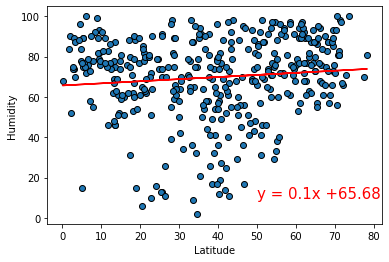

In [50]:
# get only northern hemisphere
north_lat_values = clean_city_data.loc[clean_city_data['lat'] >= 0]['lat']
north_humid_values = clean_city_data.loc[clean_city_data['lat'] >= 0]['Humidity']

# perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat_values, north_humid_values)
regress_values = north_lat_values * slope + intercept

# create string of line equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# create the scatter plot
plt.scatter(north_lat_values, north_humid_values, edgecolors='black')
plt.plot(north_lat_values, regress_values, "r-")

# formatting
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(50,10),fontsize=15,color="red")

# print the r-squared value
print(f"The r-value is: {rvalue**2}")

# save the plot as an image
plt.savefig('Images/NorthHumidVLat.png')

plt.show()

This linear regression model is looking at the relationship between latitude in the northern hemisphere and the humidity levels. As we noticed in the scatter plot looking at latitude overall versus humidity, there is no correlation between the two values. This is now supported by an r-squared value of 0.0097. Thus, our earlier claim that humidity is not determined by latitude is confirmed.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.027324979764907827


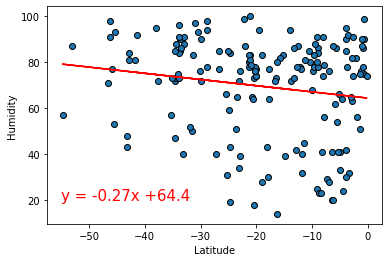

In [51]:
# get only southern hemisphere values
south_lat_values = clean_city_data.loc[clean_city_data['lat'] < 0]['lat']
south_humid_values = clean_city_data.loc[clean_city_data['lat'] < 0]['Humidity']

# perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat_values, south_humid_values)
regress_values = south_lat_values * slope + intercept

# create string of line equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# create the scatter plot
plt.scatter(south_lat_values, south_humid_values, edgecolors='black')
plt.plot(south_lat_values, regress_values, "r-")

# formatting
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")

# print the r-squared value
print(f"The r-value is: {rvalue**2}")

# save the plot as an image
plt.savefig('Images/SouthHumidVLat.png')

plt.show()

This linear regression model is looking at the relationship between latitude in the southern hemisphere and the humidity levels. Similarly to the northern hemisphere, in the southern hemisphere latitude does not have any correlation with humidity. Instead, the levels of humidity are determined by some other factor.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0005859650395497265


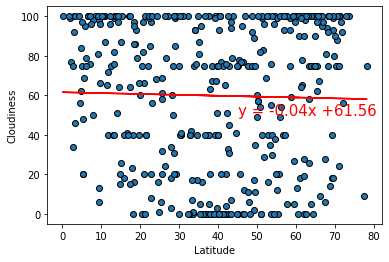

In [52]:
# get only northern hemisphere values
north_lat_values = clean_city_data.loc[clean_city_data['lat'] >= 0]['lat']
north_cloud_values = clean_city_data.loc[clean_city_data['lat'] >= 0]['Cloudiness']

# perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat_values, north_cloud_values)
regress_values = north_lat_values * slope + intercept

# create string of line equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# create the scatter plot
plt.scatter(north_lat_values, north_cloud_values, edgecolors='black')
plt.plot(north_lat_values, regress_values, "r-")

# formatting
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(45,50),fontsize=15,color="red")

# print the r-squared value
print(f"The r-value is: {rvalue**2}")

# save the plot as an image
plt.savefig('Images/NorthCloudVLat.png')

plt.show()

This linear regression model is looking at the relationship between latitude in the northern hemisphere and cloudiness. As we predicted before, there is no correlation between these two variables, resulting in an r-squared value of 0.00103. One thing to note that we noticed before is that the data points seem to group around certain cloudiness levels. These levels seem to be nice numbers (multiples of 5) like 0, 40, 75, and 100. It might be worth learning more about this data to see if these values are determined by a scientific tool or by a human who might be prone to rounding.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.01344628718441752


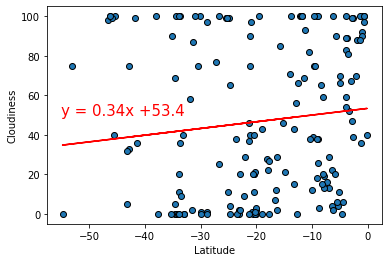

In [53]:
# get only southern hemisphere values
south_lat_values = clean_city_data.loc[clean_city_data['lat'] < 0]['lat']
south_cloud_values = clean_city_data.loc[clean_city_data['lat'] < 0]['Cloudiness']

# perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat_values, south_cloud_values)
regress_values = south_lat_values * slope + intercept

# create string of line equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# create the scatter plot
plt.scatter(south_lat_values, south_cloud_values, edgecolors='black')
plt.plot(south_lat_values, regress_values, "r-")

# formatting
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-55,50),fontsize=15,color="red")

# print the r-squared value
print(f"The r-value is: {rvalue**2}")

# save the plot as an image
plt.savefig('Images/SouthCloudVLat.png')

plt.show()

This linear regression model looks at the relationship between latitude in the southern hemisphere and cloudiness. Again, there is no real correlation between these two variables. Although the r-squared value is greater than the r-squared value from the northern hemisphere, this can be explained by the fact that the southern hemisphere has much less data than the northern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.004555688714014937


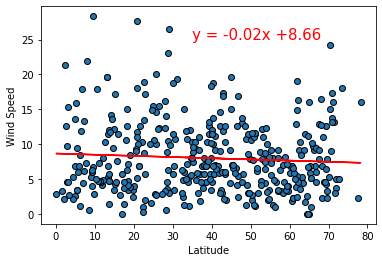

In [54]:
# get only northern hemisphere values
north_lat_values = clean_city_data.loc[clean_city_data['lat'] >= 0]['lat']
north_wind_values = clean_city_data.loc[clean_city_data['lat'] >= 0]['Wind Speed']

# perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat_values, north_wind_values)
regress_values = north_lat_values * slope + intercept

# create string of line equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# create the scatter plot
plt.scatter(north_lat_values, north_wind_values, edgecolors='black')
plt.plot(north_lat_values, regress_values, "r-")

# formatting
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(35,25),fontsize=15,color="red")

# print the r-squared value
print(f"The r-value is: {rvalue**2}")

# save the plot as an image
plt.savefig('Images/NorthWindVLat.png')

plt.show()

This linear regression model looks at the relationship between latitude in the northern hemisphere and wind speed. Like we noticed in the original scatter plot, there is no correlation between the two variables. Thus, latitude does not determine wind speed. The only thing of note is that lower wind speeds are more common than higher ones.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.036849765165034534


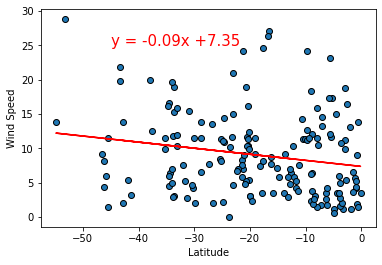

In [55]:
# get only southern hemisphere values
south_lat_values = clean_city_data.loc[clean_city_data['lat'] < 0]['lat']
south_wind_values = clean_city_data.loc[clean_city_data['lat'] < 0]['Wind Speed']

# perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat_values, south_wind_values)
regress_values = south_lat_values * slope + intercept

# create string of line equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# create the scatter plot
plt.scatter(south_lat_values, south_wind_values, edgecolors='black')
plt.plot(south_lat_values, regress_values, "r-")

# formatting
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-45,25),fontsize=15,color="red")

# print the r-squared value
print(f"The r-value is: {rvalue**2}")

# save the plot as an image
plt.savefig('Images/SouthWindVLat.png')

plt.show()

This linear regression model looks at the relationship between latitude in the southern hemisphere and wind speed. Similar to the northern hemisphere, there is no correlation between these two variables. Instead, future research should look into the relationship between altitude and wind speed. Perhaps with less to block the wind, wind speed at higher elevations might be higher on average than that at lower elevations.